In [54]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

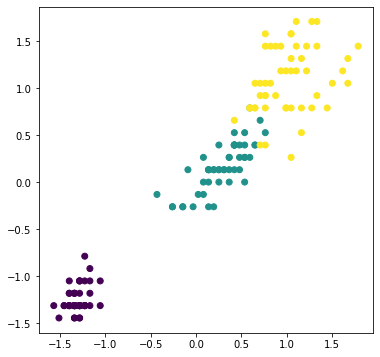

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [57]:
import time
from sklearn.metrics import classification_report
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
        
        elif self.method == "minibatch":
            start_time = time.time()
            bsize = int(0.3*X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+bsize]
                batch_y = Y[ix:ix+bsize]
                loss, grad = self.gradient(batch_X, batch_y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
        
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                mem_i = []
                idx = np.random.randint(X.shape[0])
                while i in mem_i:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                mem_i.append(i)
                if len(mem_i) == X.shape[0]:
                    mem_i = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
            

Loss at iteration 0 0.9524391414256743
Loss at iteration 500 0.17509577690875117
Loss at iteration 1000 0.13038640800747936
Loss at iteration 1500 0.11313876783816748
Loss at iteration 2000 0.10390284585091121
Loss at iteration 2500 0.09813095835403701
Loss at iteration 3000 0.09417936569512436
Loss at iteration 3500 0.09130459455551015
Loss at iteration 4000 0.08912000934241103
Loss at iteration 4500 0.0874042929045409
Loss at iteration 5000 0.08602152879951448
Loss at iteration 5500 0.08488362440014256
Loss at iteration 6000 0.0839309909114739
Loss at iteration 6500 0.08312189399077789
Loss at iteration 7000 0.08242624647170461
Loss at iteration 7500 0.08182182047224014
Loss at iteration 8000 0.08129184548788072
Loss at iteration 8500 0.08082343489448139
Loss at iteration 9000 0.08040652584024298
Loss at iteration 9500 0.08003314739222961
time taken: 0.6080172061920166
=========Classification report=======
Report:                precision    recall  f1-score   support

           0  

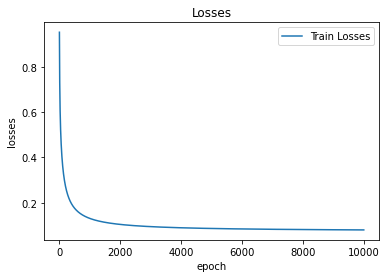

In [58]:
model = LogisticRegression(k, n, "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.0685305700749315
Loss at iteration 500 0.34290643680736166
Loss at iteration 1000 0.250388062332836
Loss at iteration 1500 0.18880031435894193
Loss at iteration 2000 0.1675330033930194
Loss at iteration 2500 0.1380801866304257
Loss at iteration 3000 0.13912906468736277
Loss at iteration 3500 0.0830880376924666
Loss at iteration 4000 0.12691692723646167
Loss at iteration 4500 0.09545469072343654
Loss at iteration 5000 0.0810278035971426
Loss at iteration 5500 0.1924756436955864
Loss at iteration 6000 0.10534494580501506
Loss at iteration 6500 0.47647163656178465
Loss at iteration 7000 0.4816137036100298
Loss at iteration 7500 0.14591458848599462
Loss at iteration 8000 0.04812312519331404
Loss at iteration 8500 0.09734475712554827
Loss at iteration 9000 0.0935247101432016
Loss at iteration 9500 0.037465882328462354
time taken: 0.6415119171142578
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1

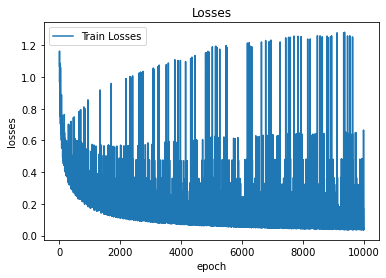

In [59]:
model = LogisticRegression(k, n, "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.4113930965120731
Loss at iteration 500 0.9263826942535779
Loss at iteration 1000 1.2970445461603102
Loss at iteration 1500 1.0478573177789798
Loss at iteration 2000 0.3631247906207181
Loss at iteration 2500 0.22272472420488634
Loss at iteration 3000 0.4036599314542589
Loss at iteration 3500 0.3766403336471186
Loss at iteration 4000 0.35906675639556573
Loss at iteration 4500 0.880855909947963
Loss at iteration 5000 0.8167525605801204
Loss at iteration 5500 0.11879898849345268
Loss at iteration 6000 0.3109768212812312
Loss at iteration 6500 0.7853524527523996
Loss at iteration 7000 0.12694432825286103
Loss at iteration 7500 0.4514857482077601
Loss at iteration 8000 0.14274575384906923
Loss at iteration 8500 0.20241385440912435
Loss at iteration 9000 0.42292407127486226
Loss at iteration 9500 0.7660876178024592
time taken: 0.5175094604492188
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00  

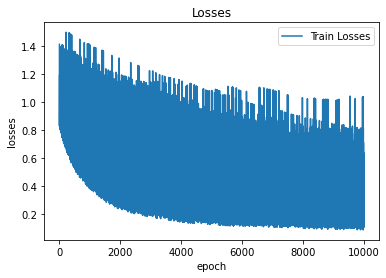

In [60]:
model = LogisticRegression(k, n, "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [61]:
model = LogisticRegression(k, n, "y and Y !!")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".

1. Time taken - those 3 method are similar.Maybe it because small data(150 sample) ,but Stochastic should be fastest
2. Training losses - batch graph are so smooth because it use whole sample for calculate. 
                     minibatch graph have a little swing because it uses subset of sample.
                     Stochastic graph are so swing because it uses only one sample.
3. Accuracy - Refer on this result, Batch and Minibatch got a same result but stochastic are little lower because Stochastic uses only one sample.               